In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import squarify
#import our palette class from colors.py
from colors import Palette

# %matplotlib notebook
%matplotlib inline


SEE ALL PALETTES ===> https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 



In [2]:
# obter o dataset dos impostos de 2018

In [3]:
df = pd.read_csv('impostos_2018')

In [4]:
df.index = df['Unnamed: 0'].values

In [5]:
df.drop(columns=df.columns[0], inplace=True)

In [6]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
Estadual,6.697903e+10,4.870228e+10,5.147431e+10,5.629541e+10,4.965523e+10,5.235668e+10,5.372910e+10,5.133238e+10,5.184065e+10,6.308679e+10,5.449734e+10,6.318690e+10
Federal,1.522279e+11,1.106890e+11,1.169892e+11,1.279465e+11,1.128549e+11,1.189947e+11,1.222520e+11,1.166667e+11,1.175650e+11,1.433817e+11,1.238599e+11,1.434499e+11
Municipal,1.566376e+10,1.138955e+10,1.203782e+10,1.316528e+10,1.161240e+10,1.224417e+10,1.257934e+10,1.200462e+10,1.212349e+10,1.475352e+10,1.274478e+10,1.477693e+10


In [7]:
#--------------------------------------------------------------------------------------------------------------

In [8]:
# vamor criar nossa pallete de cores 

In [10]:
cores1 = Palette(17, 0.65, 'spring')

In [11]:
# Vamos analisar graficamente as nossas cores atraves do nosso metodo 'graph'

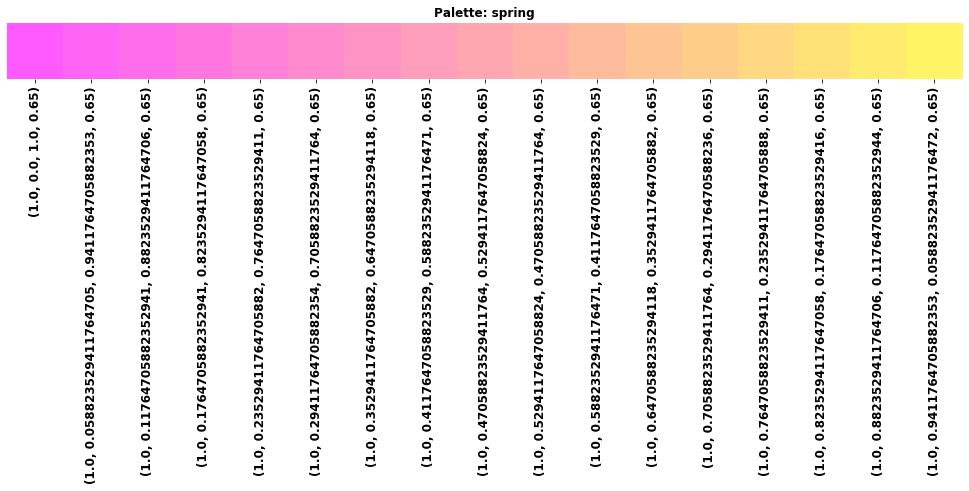

In [12]:
cores1.graph()

In [13]:
# obeter os codigos RGBA's atraves do nosso metodo 'get_colors'

In [14]:
cores_lista1 = cores1.get_colors();

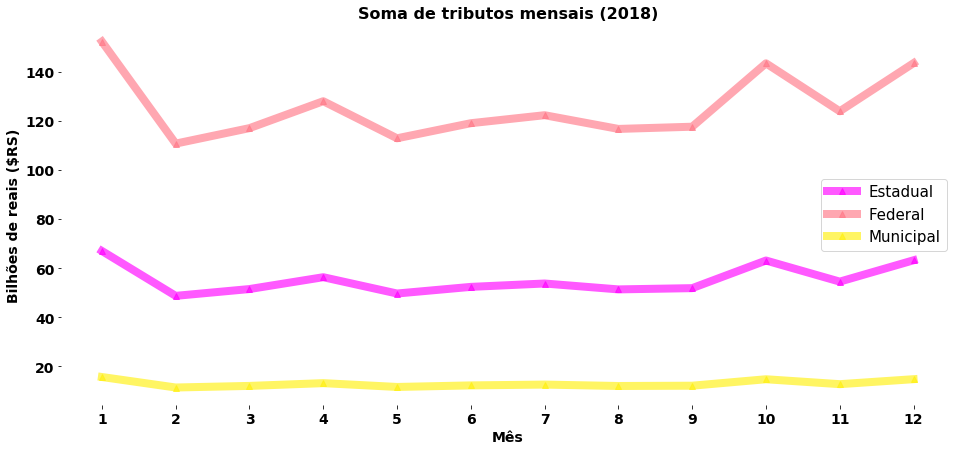

In [22]:
fig, ax = plt.subplots(figsize=(16,7));

ax.plot(df.iloc[0,:] , linewidth=8, marker='^',label = df.index[0] , color=cores_lista1[0]) # primeira cor
ax.plot(df.iloc[1,:] , linewidth=8, marker='^',label = df.index[1] , color=cores_lista1[8]) # cor da metade
ax.plot(df.iloc[2,:] , linewidth=8, marker='^',label = df.index[2] , color=cores_lista1[-1]) # ultima cor

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e9)) # bilions scale
ax.yaxis.set_major_formatter(ticks_x)

plt.xticks(df.columns,  fontsize=14 , weight='bold')
plt.yticks(fontsize=14 , weight='bold')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(fontsize=15);
plt.ylabel('Bilhões de reais ($RS)', {'weight':'bold', 'fontsize': 14  })
plt.xlabel('Mês', {'weight':'bold', 'fontsize': 14  })
plt.title('Soma de tributos mensais (2018)', fontsize=16, weight='bold');
plt.show()

In [16]:
#---------------------------------------------------tree map----------------------------------------

In [24]:
cores2 = Palette(8, 0.65, 'hsv')

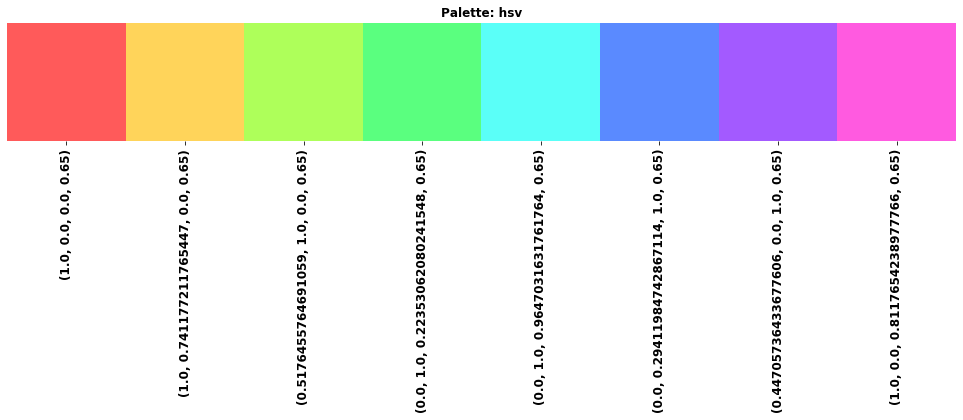

In [25]:
cores2.graph()

In [26]:
cores_lista2 = cores2.get_colors();

In [27]:
# obter a media anual em bilhões
media_anual = df.mean(axis=1)/1e9

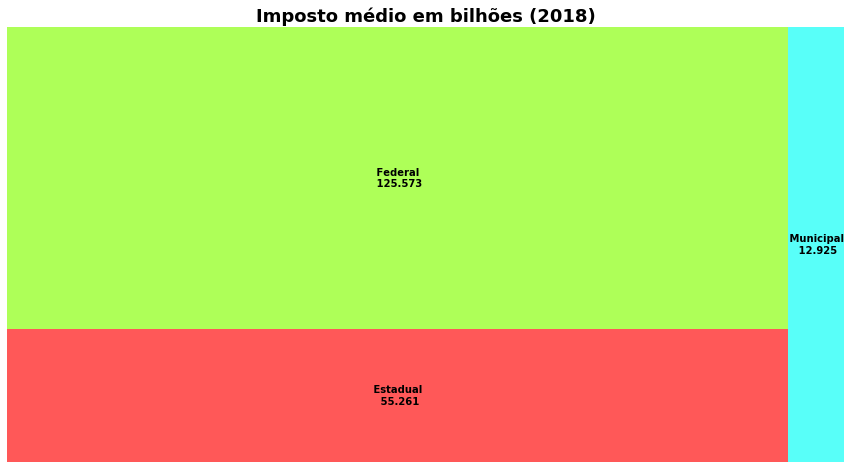

In [29]:
labels = [ " {} \n {}".format(nome,round(num,3)) for nome, num in zip(media_anual.index,media_anual.values) ]

fig, ax = plt.subplots(figsize=(15,8));
squarify.plot(sizes=media_anual.values, label=labels , color=cores_lista2[0:-1:2] , text_kwargs={'fontsize':10, 'weight':'heavy'})
plt.axis('off')
plt.title('Imposto médio em bilhões (2018)', fontsize=18, weight ='heavy')
plt.show()